# ***Grover's Algorithm implementation***
---
Implementation of Grover class to solve a 2x2 sudoku and calculate the parameters of the circuit to solve a 9x9 sudoku. 

In [1]:
import matplotlib.pyplot as plt

from python_package.modified_grover import Grover
from python_package.sudoku import Sudoku, Board
from pytket.extensions.qiskit import qiskit_to_tk, AerBackend
#from pytket.circuit.display import render_circuit_jupyter
from pytket.utils import probs_from_counts


## **2x2 Sudoku**

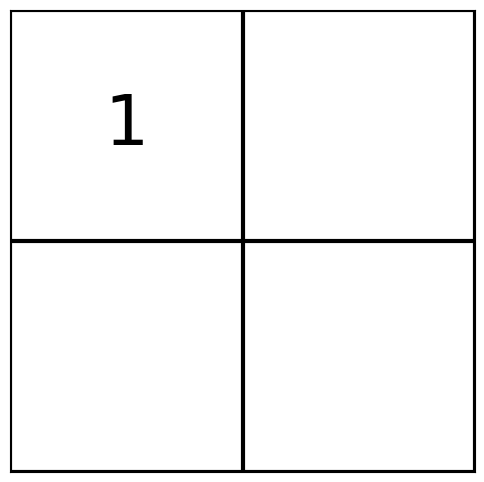

In [2]:
sudoku_2x2 = Sudoku("../../data/2x2sudoku.csv")
sudoku_2x2.plot_grid()

In [3]:
# Initialize a Board instance to represent a sudoku
sudoku_board = Board(unit_height=1,
                     unit_width=1,
                     grid_height=2,
                     grid_width=2,
                     init_value=-1)

sudoku_board.print_board()

[-1, -1]
[-1, -1]


In [4]:
# Initialize the preset values of the sudoku
values = [next(iter(value)) for value in sudoku_2x2.set_tuples.values()]
positions = list(sudoku_2x2.set_tuples.keys())


sudoku_board.update_board(values, positions)
sudoku_board.print_board()

[1, -1]
[-1, -1]


In [5]:
tuples = sudoku_board.get_open_indexed_tuples()
index_field_values = {}

for key, value in sudoku_2x2.set_tuples.items():
    cell_index = key[0]*9 + key[1]
    index_field_values[cell_index] = next(iter(value))  

# grover instance initialization
grover = Grover(tuples=tuples, field_values=index_field_values, 
                subunit_height=1, subunit_width=1)

qc = grover.circuit

In [6]:
# Convert the qiskit circuit into a tket circuit
tket_circ = qiskit_to_tk(qc)
render_circuit_jupyter(tket_circ)

NameError: name 'render_circuit_jupyter' is not defined

In [ ]:
# Simulate the circuit
backend = AerBackend()
compiled_circ = backend.get_compiled_circuit(tket_circ)

handle = backend.process_circuit(compiled_circ, n_shots=1024)
counts = backend.get_result(handle).get_counts()

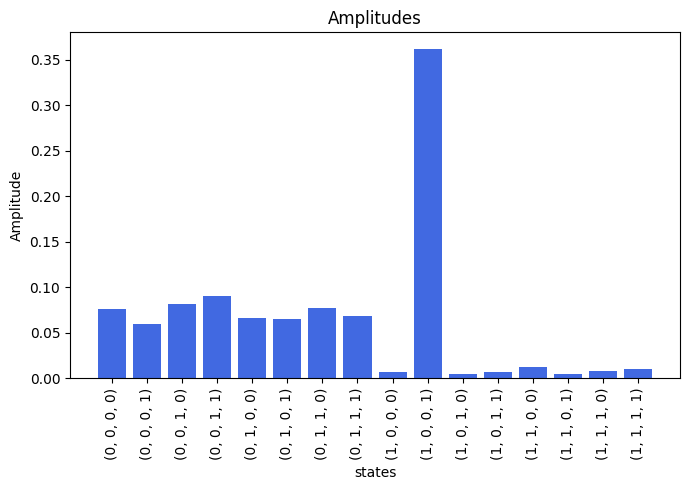

In [ ]:
data = probs_from_counts(counts)

# Extract keys and values
keys = list(data.keys())
values = list(data.values())

# Convert keys to string representation for plotting
keys_str = [str(key) for key in keys]

# Create the bar plot
plt.figure(figsize=(7, 5))
plt.bar(keys_str, values, color='royalblue')

# Add title and labels
plt.title('Amplitudes')
plt.xlabel('states')
plt.ylabel('Amplitude')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

## **9x9 Sudoku**

#### Primitive

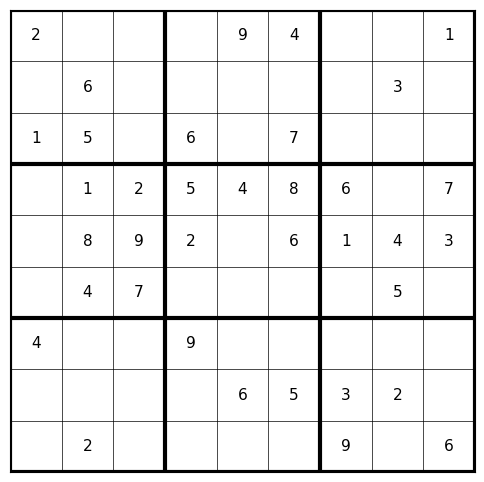

In [2]:
easy_sudoku_1 = Sudoku("../../data/easy2.csv")
easy_sudoku_1.plot_grid()

In [3]:
sudoku_board = Board(unit_height=3,
                     unit_width=3,
                     grid_height=3,
                     grid_width=3,
                     init_value=-1)

sudoku_board.print_board()

[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]


In [6]:
easy_sudoku_1.set_tuples.values()

dict_values([{2}, {9}, {4}, {1}, {6}, {3}, {1}, {5}, {6}, {7}, {1}, {2}, {5}, {4}, {8}, {6}, {7}, {8}, {9}, {2}, {6}, {1}, {4}, {3}, {4}, {7}, {5}, {4}, {9}, {6}, {5}, {3}, {2}, {2}, {9}, {6}])

In [ ]:
values = [next(iter(value)) for value in easy_sudoku_1.set_tuples.values()]
positions = list(easy_sudoku_1.set_tuples.keys())


sudoku_board.update_board(values, positions)
sudoku_board.print_board()

[2, -1, -1, -1, 9, 4, -1, -1, 1]
[-1, 6, -1, -1, -1, -1, -1, 3, -1]
[1, 5, -1, 6, -1, 7, -1, -1, -1]
[-1, 1, 2, 5, 4, 8, 6, -1, 7]
[-1, 8, 9, 2, -1, 6, 1, 4, 3]
[-1, 4, 7, -1, -1, -1, -1, 5, -1]
[4, -1, -1, 9, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, 6, 5, 3, 2, -1]
[-1, 2, -1, -1, -1, -1, 9, -1, 6]


In [9]:
tuples = sudoku_board.get_open_indexed_tuples()
tuples

[(0, 9),
 (0, 18),
 (0, 27),
 (0, 36),
 (0, 45),
 (0, 54),
 (0, 63),
 (0, 72),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 19),
 (0, 20),
 (1, 10),
 (1, 19),
 (1, 28),
 (1, 37),
 (1, 46),
 (1, 55),
 (1, 64),
 (1, 73),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 11),
 (1, 18),
 (1, 20),
 (2, 11),
 (2, 20),
 (2, 29),
 (2, 38),
 (2, 47),
 (2, 56),
 (2, 65),
 (2, 74),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 18),
 (2, 19),
 (3, 12),
 (3, 21),
 (3, 30),
 (3, 39),
 (3, 48),
 (3, 57),
 (3, 66),
 (3, 75),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 13),
 (3, 14),
 (3, 22),
 (3, 23),
 (4, 13),
 (4, 22),
 (4, 31),
 (4, 40),
 (4, 49),
 (4, 58),
 (4, 67),
 (4, 76),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 12),
 (4, 14),
 (4, 21),
 (4, 23),
 (5, 14),
 (5, 23),
 (5, 32),
 (5, 41),
 (5, 50),
 (5, 59),
 (5, 68),
 (5, 77),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 12),
 (5, 13),
 (5, 2

In [10]:
tuples = sudoku_board.get_open_indexed_tuples()
index_field_values = {}

for key, value in easy_sudoku_1.set_tuples.items():
    cell_index = key[0]*9 + key[1]
    index_field_values[cell_index] = next(iter(value)) - 1 


In [11]:
index_field_values

{0: 1,
 4: 8,
 5: 3,
 8: 0,
 10: 5,
 16: 2,
 18: 0,
 19: 4,
 21: 5,
 23: 6,
 28: 0,
 29: 1,
 30: 4,
 31: 3,
 32: 7,
 33: 5,
 35: 6,
 37: 7,
 38: 8,
 39: 1,
 41: 5,
 42: 0,
 43: 3,
 44: 2,
 46: 3,
 47: 6,
 52: 4,
 54: 3,
 57: 8,
 67: 5,
 68: 4,
 69: 2,
 70: 1,
 73: 1,
 78: 8,
 80: 5}

In [12]:
grover = Grover(tuples=tuples, field_values=index_field_values, 
                subunit_height=3, subunit_width=3)

qc = grover.circuit

In [ ]:
circ = qiskit_to_tk(qc)

In [ ]:
print("Total qubits count =", circ.n_qubits)
print("Total gate count =", circ.n_gates)

Total qubits count = 978
Total gate count = 1071521


In [ ]:
print("#1qb gates =", circ.n_1qb_gates())
print("#2qb gates =", circ.n_2qb_gates())
print("#3qb gates =", circ.n_nqb_gates(3))
print("#4qb gates =", circ.n_nqb_gates(4))
print("#5qb gates =", circ.n_nqb_gates(5))

#1qb gates = 13286
#2qb gates = 104480
#3qb gates = 313440
#4qb gates = 417920
#5qb gates = 208960


In [ ]:
print("Circuit depth =", circ.depth())

Circuit depth = 1020863


#### Pre processing

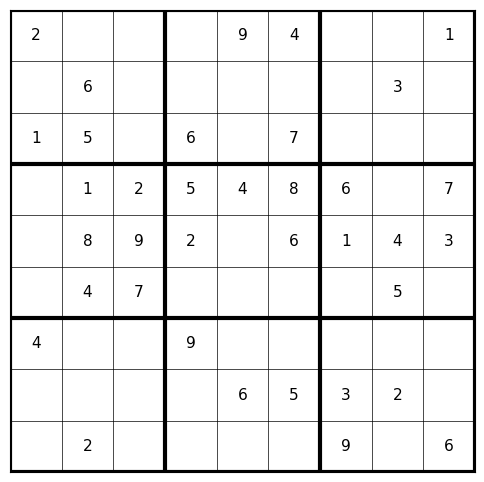

In [ ]:
easy_sudoku_1 = Sudoku("../../data/easy2.csv")
easy_sudoku_1.plot_grid()

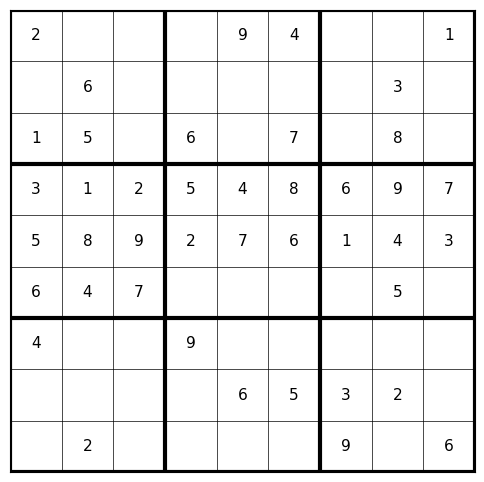

In [ ]:
easy_sudoku_1.general_preprocessing()
easy_sudoku_1.general_preprocessing()
easy_sudoku_1.plot_grid()

In [ ]:
sudoku_board = Board(unit_height=3,
                     unit_width=3,
                     grid_height=3,
                     grid_width=3,
                     init_value=-1)

sudoku_board.print_board()

[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]


In [ ]:
values = [next(iter(value)) for value in easy_sudoku_1.set_tuples.values()]
positions = list(easy_sudoku_1.set_tuples.keys())


sudoku_board.update_board(values, positions)
sudoku_board.print_board()

[2, -1, -1, -1, 9, 4, -1, -1, 1]
[-1, 6, -1, -1, -1, -1, -1, 3, -1]
[1, 5, -1, 6, -1, 7, -1, 8, -1]
[3, 1, 2, 5, 4, 8, 6, 9, 7]
[5, 8, 9, 2, 7, 6, 1, 4, 3]
[6, 4, 7, -1, -1, -1, -1, 5, -1]
[4, -1, -1, 9, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, 6, 5, 3, 2, -1]
[-1, 2, -1, -1, -1, -1, 9, -1, 6]


In [ ]:
tuples = sudoku_board.get_open_indexed_tuples()
index_field_values = {}

for key, value in easy_sudoku_1.set_tuples.items():
    cell_index = key[0]*9 + key[1]
    index_field_values[cell_index] = next(iter(value)) - 1 


In [ ]:
grover = Grover(tuples=tuples, field_values=index_field_values, 
                subunit_height=3, subunit_width=3)

qc = grover.circuit

In [ ]:
circ = qiskit_to_tk(qc)
del qc

In [ ]:
print("Total qubits count =", circ.n_qubits)
print("Total gate count =", circ.n_gates)

Total qubits count = 900
Total gate count = 850710


In [ ]:
print("#1qb gates =", circ.n_1qb_gates())
print("#2qb gates =", circ.n_2qb_gates())
print("#3qb gates =", circ.n_nqb_gates(3))
print("#4qb gates =", circ.n_nqb_gates(4))
print("#5qb gates =", circ.n_nqb_gates(5))

#1qb gates = 11990
#2qb gates = 82800
#3qb gates = 248400
#4qb gates = 331200
#5qb gates = 165600


In [ ]:
print("Circuit depth =", circ.depth())

Circuit depth = 828057


#### Pre processing and column remove

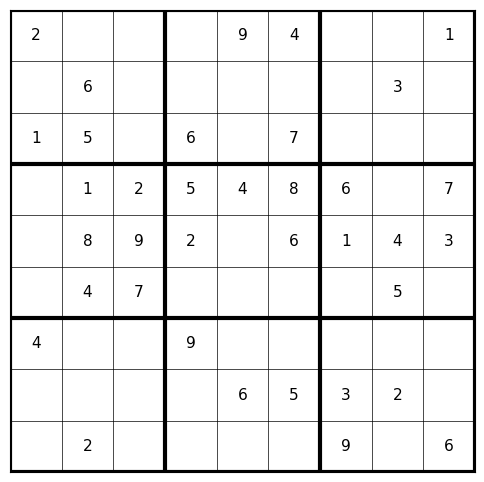

In [ ]:
easy_sudoku_1 = Sudoku("../../data/easy2.csv")
easy_sudoku_1.plot_grid()

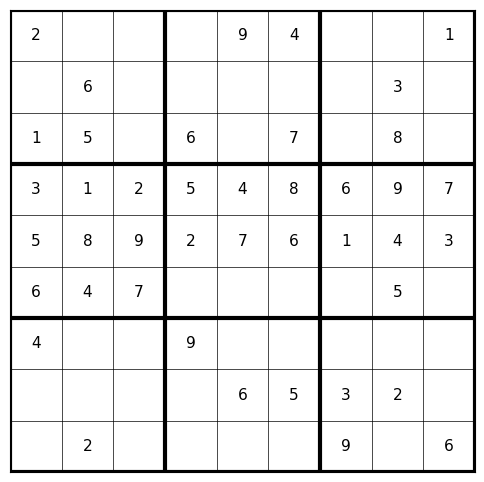

In [ ]:
easy_sudoku_1.general_preprocessing()
easy_sudoku_1.general_preprocessing()
easy_sudoku_1.plot_grid()

In [ ]:
sudoku_board = Board(unit_height=3,
                     unit_width=3,
                     grid_height=3,
                     grid_width=3,
                     init_value=-1)

sudoku_board.print_board()

[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1]


In [ ]:
values = [next(iter(value)) for value in easy_sudoku_1.set_tuples.values()]
positions = list(easy_sudoku_1.set_tuples.keys())


sudoku_board.update_board(values, positions)
sudoku_board.print_board()

[2, -1, -1, -1, 9, 4, -1, -1, 1]
[-1, 6, -1, -1, -1, -1, -1, 3, -1]
[1, 5, -1, 6, -1, 7, -1, 8, -1]
[3, 1, 2, 5, 4, 8, 6, 9, 7]
[5, 8, 9, 2, 7, 6, 1, 4, 3]
[6, 4, 7, -1, -1, -1, -1, 5, -1]
[4, -1, -1, 9, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, 6, 5, 3, 2, -1]
[-1, 2, -1, -1, -1, -1, 9, -1, 6]


In [ ]:
tuples = sudoku_board.get_open_indexed_tuples()
removed_cells = [8, 17, 26, 35, 44, 53, 62, 71, 80]
index_field_values = {}

for key, value in easy_sudoku_1.set_tuples.items():
    cell_index = key[0]*9 + key[1]
    index_field_values[cell_index] = next(iter(value)) - 1 

filtered_tuples = [tup for tup in tuples if not any(elem in removed_cells for elem in tup)]
filtered_field_values = {k: v for k, v in index_field_values.items() if k not in removed_cells}

In [ ]:
grover = Grover(tuples=filtered_tuples, field_values=filtered_field_values, 
                subunit_height=3, subunit_width=3)

qc = grover.circuit

In [ ]:
circ = qiskit_to_tk(qc)
del qc

In [ ]:
print("Total qubits count =", circ.n_qubits)
print("Total gate count =", circ.n_gates)

Total qubits count = 757
Total gate count = 693336


In [ ]:
print("#1qb gates =", circ.n_1qb_gates())
print("#2qb gates =", circ.n_2qb_gates())
print("#3qb gates =", circ.n_nqb_gates(3))
print("#4qb gates =", circ.n_nqb_gates(4))
print("#5qb gates =", circ.n_nqb_gates(5))

#1qb gates = 10658
#2qb gates = 67392
#3qb gates = 202176
#4qb gates = 269568
#5qb gates = 134784


In [ ]:
print("Circuit depth =", circ.depth())

Circuit depth = 673977
